In [232]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, precision_score, recall_score


import seaborn as sns

%matplotlib inline

In [117]:
imdb_data = pd.read_csv('movie_metadata.csv')

In [118]:
imdb_data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131,NaN,Rob Walker,131,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12,7.1,NaN,0


# Cleaning the data

Removing all non numeric data.

In [119]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in imdb_data.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = imdb_data.columns.difference(str_list)

I tried filling values for this label with Zeros and the mean of the values and I the mean worked better. It resulted in more precision and recall

In [120]:
imdb_data['imdb_score']=imdb_data['imdb_score'].fillna(np.mean).astype(int)



In [346]:
movie_num = imdb_data[num_list]


In [348]:
movie_num.head(5)

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000,936,855,1.78,237000000,4834,0,178,0,760505847,7,33000,723,3054,886204,2009
1,40000,5000,1000,2.35,300000000,48350,563,169,0,309404152,7,0,302,1238,471220,2007
2,11000,393,161,2.35,245000000,11700,0,148,1,200074175,6,85000,602,994,275868,2015
3,27000,23000,23000,2.35,250000000,106759,22000,164,0,448130642,8,164000,813,2701,1144337,2012
4,131,12,NaN,NaN,NaN,143,131,NaN,0,NaN,7,0,NaN,NaN,8,NaN


In [122]:
movie_num = movie_num.fillna(value = 0, axis = 1)

Specifying my features. I picked all numeric data 15 features and my label will be the imdb_score. 

In [123]:
movie_feat = movie_num.drop('imdb_score', axis = 1 )

Normalizing the data taking the variance of the data into consideration and neglecting the mean. the standard scaler works better than normalizing the data to a unit norm 

In [124]:
scaler = StandardScaler()
mov_scaled = scaler.fit_transform(movie_feat)

In [289]:
movie_num['imdb_score'].value_counts()

6    1811
7    1450
5     972
4     326
8     319
3     115
2      36
9       9
1       5
Name: imdb_score, dtype: int64

In [125]:
z = movie_num['imdb_score'].values

In [177]:
z

array([7, 7, 6, ..., 6, 6, 6])

I'm using the train test split method. Using 70% of the data for training and 30% for testing. It's random, effecient and serves as a check for overfitting.

Split the dataset into two pieces, so that the model can be trained and tested on different data.

Better estimate of out-of-sample performance, but still a "high variance" estimate

In [127]:
X_train, X_test, y_train, y_test = train_test_split(mov_scaled, z, test_size=0.3, random_state=0)


# The classifier

The data is not linearly seperable, so Linear discriminant was pretty bad. I tried first naive bayes, but since the data is not normally distributed I was getting bad results, KNN also was bad, because it was neglecting the distribution of the classes. Then Decision trees didn't provide that much improvement, so  I used ensembling and boosting techniques to improve my results. Random forest and Gradient boosting  raised the accuracy to over 50%. The no.of estimators parameter improved the accuracy a lot. 

Ensemble model combines multiple individual models together to enhance prediction. 
There is low correlation between the features, so ensemble in general  should work fine with that(Random Forest). The forest basically chooses the classification having the most votes (over all the trees in the forest). 

In [274]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier(n_estimators=50, max_depth=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
"RandomForest",accuracy_score(y_test,y_pred)

('RandomForest', 0.52875082617316593)

# Measuring performance 

I got an accuracy of almost 53% coorectly classified. 

the confusion matrix tells me all about accuracy, precision and recall 

In [164]:
conf = confusion_matrix(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
print(prec)
recall = recall_score(y_test, y_pred, average='weighted')
print(recall)

0.519978904446
0.531394580304


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [316]:
conf

array([[  0,   0,   0,   6,   6,   1,   0,   0],
       [  0,   2,   5,  13,  14,   3,   0,   0],
       [  0,   1,   5,  47,  36,   3,   0,   0],
       [  0,   1,   7, 107, 158,  22,   0,   0],
       [  0,   1,   6,  33, 381, 111,   1,   0],
       [  0,   0,   4,   7, 155, 261,   9,   0],
       [  0,   0,   2,   0,   5,  50,  47,   0],
       [  0,   0,   0,   1,   0,   0,   1,   1]])

In [334]:
precision5 = conf[4,4]/sum(conf[:,4])
print(precision5)
recall5 = conf[4,4]/sum(conf[4])
print(recall5)

0.504635761589
0.714821763602


In [335]:
precision6 = conf[5,5]/sum(conf[:,5])
print(precision7)
recall6 = conf[5,5]/sum(conf[5])
print(recall6)

0.578713968958
0.598623853211


In [336]:
precision7 = conf[6,6]/sum(conf[:,6])
print(precision7)
recall7 = conf[6,6]/sum(conf[6])
print(recall7)

0.810344827586
0.451923076923


Because there isn't enough examples for some classes the model isn't able to generalize very well. but it 's getting a precision of around 52% 

which means when a true positive label is predicted the model is 52% likely to predict it correctly. 


it measures how precise our model is when predicting a specific label !




Recall means when the actual label is predicted. how often is the prediction correct !

It's the rate of the true positive values 

Again the inconsistency of the data plays the biggest part we don't have enough data for some labels so the model is not able to generalize pretty well

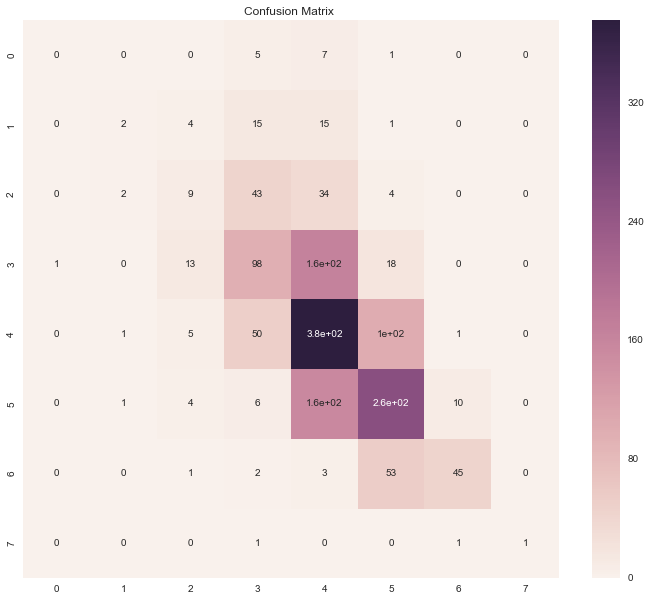

In [345]:
plt.figure(figsize = (12,10))
plt.title('Confusion Matrix ')
sns.heatmap(conf, annot=True)

Boosting 
boosting is an iterative technique it adjusts the weight of an observation based on the last classification. I was trying to make sure the model is not Biased and that it's not overfitting. I used a learning rate of 0.1 to avoid being stuck in local minimum.

In [279]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
clf=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)
print("Gradient Boosting",accuracy_score(y_test,y_pred1))
prec1 = precision_score(y_test, y_pred1, average='weighted')
print(prec1)
recall1 = recall_score(y_test, y_pred1, average='weighted')
print(recall1)

Gradient Boosting 0.513549239921
0.505813051887
0.513549239921


# Trying to predict the score using the likes on facebook 

In [29]:
my=list(zip(imdb_data['director_facebook_likes'],imdb_data['actor_1_facebook_likes'],imdb_data['actor_2_facebook_likes'],imdb_data['actor_3_facebook_likes']))
X = np.array(my)

y = z
X
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
imdb_data['num_critic_for_reviews']=imdb_data['num_critic_for_reviews'].fillna(0.0).astype(np.float32)
imdb_data['director_facebook_likes']=imdb_data['director_facebook_likes'].fillna(0.0).astype(np.float32)
imdb_data['actor_3_facebook_likes'] = imdb_data['actor_3_facebook_likes'].fillna(0.0).astype(np.float32)
imdb_data['actor_1_facebook_likes'] = imdb_data['actor_1_facebook_likes'].fillna(0.0).astype(np.float32)
imdb_data['gross'] = imdb_data['gross'].fillna(0.0).astype(np.float32)
imdb_data['num_voted_users'] = imdb_data['num_voted_users'].fillna(0.0).astype(np.float32)
imdb_data['cast_total_facebook_likes'] = imdb_data['cast_total_facebook_likes'].fillna(0.0).astype(np.float32)
imdb_data['num_user_for_reviews'] = imdb_data['num_user_for_reviews'].fillna(0.0).astype(np.float32)
imdb_data['facenumber_in_poster'] = imdb_data['facenumber_in_poster'].fillna(0.0).astype(np.float32)
imdb_data['actor_2_facebook_likes'] = imdb_data['actor_2_facebook_likes'].fillna(0.0).astype(np.float32)
imdb_data['budget'] = imdb_data['budget'].fillna(0.0).astype(np.float32)
imdb_data['movie_facebook_likes'] = imdb_data['movie_facebook_likes'].fillna(0.0).astype(np.float32)


imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       5043 non-null float32
duration                     5028 non-null float64
director_facebook_likes      5043 non-null float32
actor_3_facebook_likes       5043 non-null float32
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5043 non-null float32
gross                        5043 non-null float32
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null float32
cast_total_facebook_likes    5043 non-null float32
actor_3_name                 5020 non-null object
facenumber_in_poster         5043 non-null float32
plot_keywords                4890 non-null object
movie_imdb_link              5043 

In [342]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred2 = clf.predict(X_test)
"RandomForest",accuracy_score(y_test,y_pred2)

('RandomForest', 0.52148050231328491)

In [343]:
conf = confusion_matrix(y_test, y_pred2)
prec = precision_score(y_test, y_pred2, average='weighted')
print(prec)
recall = recall_score(y_test, y_pred2, average='weighted')
print(recall)

0.512346697335
0.521480502313


Using social media numbers only. it produced numbers close to previous numbers 